In [4]:
import os 
from datasets import load_dataset

/home/ksmehrab/miniconda/envs/segzero/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
dataset_path = "/data/VLMGroundingProject/Datasets/InstructPart/train1800/instructpart_train_dataset_for_segzero_840"

In [6]:
dataset = load_dataset(dataset_path)

In [7]:
dataset['train'][0]

{'id': 'suitcase_000303',
 'problem': "suitcase's telescopic_handle",
 'solution': '[{"bbox_2d": [405, 4, 661, 52], "point_2d": [533, 28]}]',
 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=840x840>,
 'img_height': 1024,
 'img_width': 517}

In [26]:
# set a prompt template 

# """
# First decide if what you have to find an object or a part within an object. Output your decision in this format <decide> object or part </decide>"

# I also want to make the model generate each step in sequence, so maybe mention something like "Next, reason about where the object is and if you need to find a part, where the part lies within the object. Also make sure the boxes you propose are for the part (not the whole object). output your thinking process in <think> </think> tags. Based on this, generate a first answer within <first_answer> </first_answer> tags. Next check if your first answer is actually on the required object or object part. If necessary, generate a criticism and suggest adjustments that need to be made to the first answer. Output this in <criticism> </criticism> tags. Finally, output your final adjusted answer in <answer> </answer> tags. 
# "i.e., " \
#     "<decide>object|part</decide>" \
#     "<think> thinking process here </think>" \
#     "<first_answer>[{\"bbox_2d\":[x1,y1,x2,y2],\"point_2d\":[cx,cy]}]</first_answer>" \
#     "<criticism max_tokens> critic of first answer and necessary adjustments here </criticism>" \
#     "<answer>[{\"bbox_2d\":[x1,y1,x2,y2],\"point_2d\":[cx,cy]}]</answer>""

# """

# vision reasonder prompt

# prompt = "<image>\n" \
#         "Please find \"{Question}\" with bboxs and points." \
#             "Compare the difference between object(s) and find the most closely matched object(s)." \
#             "Output the thinking process in <think> </think> and final answer in <answer> </answer> tags." \
#             "Output the bbox(es) and point(s) inside the interested object(s) in JSON format." \
#             "i.e., <think> thinking process here </think>" \
#             "<answer>{Answer}</answer>"


# prompt = "Please find \"{Question}\" with bboxs and points. " \
#     "Boxes must be tight and compact (no extra background)." \
#     "The representative point must lie inside the object or part. If nothing matches, output an empty list []. \n\n" \
#     "STEP 1 — DECIDE:\n" \
#     'First, decide whether the query refers to a "whole object" or a "part" within an object. ' \
#     'Output either "object" or "part" in <decide> </decide> tags\n\n' \
#     "STEP 2 — THINK:\n" \
#     "Next, reason about where the object is. If a part is required, reason where the part lies within the object. " \
#     "Make sure any proposed box is for the part (not the whole object) when the query is a part. " \
#     "Output your thinking in <think> </think> tags.\n\n" \
#     "STEP 3 — FIRST ANSWER:\n" \
#     "Based on your thinking, generate an initial prediction in <first_answer> </first_answer> tags, " \
#     "containing a JSON list of entries with bbox_2d and point_2d.\n\n" \
#     "STEP 4 — CRITICISM:\n" \
#     "Check if your first answer tightly encloses the required object or object part. " \
#     "If adjustments are needed, briefly describe the issue and suggested adjustments. " \
#     "Output this in <criticism> </criticism> tags.\n\n" \
#     "STEP 5 — FINAL ANSWER:\n" \
#     "Finally, output your adjusted final prediction in <answer> </answer> tags using the same JSON structure.\n\n" \
#     "Output format example " \
#     "<decide> decision about whether you are finding an object or an object's part </decide> " \
#     "<think> thinking process here </think> " \
#     '<first_answer>[{{"bbox_2d":[x1,y1,x2,y2],"point_2d":[cx,cy]}}]</first_answer> ' \
#     "<criticism> critic of first answer and necessary adjustments here </criticism> " \
#     '<answer>[{{"bbox_2d":[x1,y1,x2,y2],"point_2d":[cx,cy]}}]</answer>'

# prompt = "Please find \"{Question}\" with bboxs and points. " \
#     "Boxes must be tight and compact (no extra background)." \
#     "The representative point must lie inside the object or part. If nothing matches, output an empty list []. \n\n" \
#     "STEP 1 — THINK:\n" \
#     'First, decide whether you need to find a "whole object" or a "part" within an object. ' \
#     "Reason about where the object or the part is. If a part is required, reason where the part lies within the object and " \
#     "make sure any proposed box is for the part (not the whole object) when the query is a part. " \
#     "Output your thinking in <think> </think> tags.\n\n" \
#     'Output your decision about whether you are finding an "object" or a "part" in <decide> </decide> tags\n\n' \
#     "STEP 2 — FIRST ANSWER:\n" \
#     "Based on your thinking and decision, generate an initial prediction in <first_answer> </first_answer> tags, " \
#     "containing a JSON list of entries with bbox_2d and point_2d.\n\n" \
#     "STEP 3 — CRITICISM:\n" \
#     "Check if your first answer tightly encloses the required object or object part. " \
#     "If adjustments are needed, describe the issue and suggested adjustments. Example of necessary adjustments could be to make the bboxes smaller or bigger, or move the bboxes in any direction. " \
#     "Output this in <criticism> </criticism> tags.\n\n" \
#     "STEP 4 — FINAL ANSWER:\n" \
#     "Adjust the first_answer based on the criticism, and output your adjusted final answer in <final_answer> </final_answer> tags containing a JSON list of entries with bbox_2d and point_2d.\n\n" \
#     "Output format example " \
#     "<think> thinking process here </think> " \
#     '<decide> I am finding an "object"|"object part" </decide> ' \
#     '<first_answer>[{{"bbox_2d":[x1,y1,x2,y2],"point_2d":[cx,cy]}}]</first_answer> ' \
#     "<criticism> critic of first answer and necessary adjustments here </criticism> " \
#     '<final_answer>[{{"bbox_2d":[x1,y1,x2,y2],"point_2d":[cx,cy]}}]</final_answer>'

prompt = 'Please find \"{Question}\" with bounding boxes and points from the given image.\n'\
'Your goal is to output tight bounding boxes and a representative point.\n\n'\
'GENERAL RULES:\n'\
'- Output tight, compact boxes with minimal extra background.\n'\
'- The representative point must lie inside \"{Question}\"\n'\
'- If nothing matches the query, output [] for the relevant JSON lists.\n'\
'- The query may refer to a whole object or a part of an object. If the query is about a part, you should first think about and find the whole object that contains the part , then find the part within that object.\n\n'\
'You MUST follow these steps and output structure.\n\n'\
'STEP 1 — Think\n'\
'In <think> </think> tags, think about:\n'\
'- What the query is asking for.\n'\
'- Whether it is a whole object or a part.\n'\
'- Where it is in the image.\n\n'\
'STEP 2 — Decide if you are finding an object or a part\n'\
'In <target> </target> tags, output either “object" or "part"\n'\
'- "object": the query is about a whole object.\n'\
'- "part": the query is about a part of an object.\n\n'\
'STEP 3 — If <target> is a “part”, locate the object to which the part belongs\n'\
'- If <target> is "part", first find the whole object(s) that contain the part. In <object_hint> </object_hint> tags, output a JSON list of these object boxes:\n'\
'[{{"bbox_2d": [x1, y1, x2, y2], "point_2d": [cx, cy]}},...]\n'\
'If <target> is “object”, inside <object_hint> tags output a single empty list: [] .\n\n'\
'STEP 4 — First Answer\n'\
'In <first_answer> </first_answer> tags, output a JSON list of the boxes for what the query directly refers to, that is \"{Question}\":\n'\
'[{{"bbox_2d": [px1, py1, px2, py2], "point_2d": [pcx, pcy]}},...]\n'\
'- If <target> is “object”, these boxes should cover the whole object.\n'\
'- If <target> is “part”, these boxes should cover only the part (not the entire object). The part should be within the object boxes in <object_hint>.\n\n'\
'STEP 5 — Criticism (Self-Check)\n'\
'In <criticism> </criticism> tags, you will check your first answer. What do the boxes in <first_answer> enclose? They should tightly enclose \"{Question}\”.  If adjustments are needed, describe the issue and suggested adjustments. Example of necessary adjustments could be to make the bboxes smaller or bigger, or move the bboxes in any direction.\n'\
'The last part inside <criticism> MUST be exactly one of:\n'\
'- "ADJUSTMENT: YES"\n'\
'- or “ADJUSTMENT: NO"\n'\
'Output "ADJUSTMENT: NO”  if the boxes and points in <first_answer> are correct and no adjustments are necessary. Output "ADJUSTMENT: YES" if the <first_answer> needs adjustments to enclose \"{Question}\"\n'\
'Examples:\n'\
'- "<criticism>...The box is already tight and correctly placed. ADJUSTMENT: NO</criticism>"\n'\
'- "<criticism>...The box is slightly too large and shifted down; I will move it up and shrink it. ADJUSTMENT: YES</criticism>"\n\n'\
'STEP 6 — FINAL ANSWER\n'\
'In <answer> </answer> tags, output the final answer.\n'\
'- If <criticism> ends with "ADJUSTMENT: NO":\n' \
'  - The JSON list in <answer> MUST be IDENTICAL to the JSON list in <first_answer>.\n'\
'- If <criticism> ends with "ADJUSTMENT: YES":\n'\
'  - At least one bbox_2d or point_2d in <answer> MUST be different from those in <first_answer>,\n'\
'    and the changes should counter the entire <criticism> and incorporate the adjustments.\n'\
'The <answer> should contain a JSON list of entries with bbox_2d and point_2d.\n'\
'[{{"bbox_2d": [qx1, qy1, qx2, qy2], "point_2d": [qcx, qcy]}},...]\n\n'\
'OUTPUT FORMAT EXAMPLE (STRUCTURE ONLY):\n'\
'<think>thinking here</think>\n'\
'<target>object|part</target>\n'\
'<object_hint>[{{"bbox_2d": [x1,y1,x2,y2], "point_2d": [cx,cy]}}, // additional boxes if found] | []</object_hint>\n'\
'<first_answer>[{{"bbox_2d": [px1,py1,px2,py2], "point_2d": [pcx,pcy]}}, // additional boxes if found]</first_answer>\n'\
'<criticism>criticism here. ADJUSTMENT: YES|NO</criticism>\n'\
'<answer>[{{"bbox_2d": [qx1,qy1,qx2,qy2], "point_2d": [qcx, qcy]}}, // additional boxes if found]</answer>\n'

In [21]:
print(prompt)

<image>
Please find "{Question}" with bboxs and points.Compare the difference between object(s) and find the most closely matched object(s).Output the thinking process in <think> </think> and final answer in <answer> </answer> tags.Output the bbox(es) and point(s) inside the interested object(s) in JSON format.i.e., <think> thinking process here </think><answer>{Answer}</answer>


In [10]:
from transformers import Qwen2_5_VLForConditionalGeneration, AutoProcessor
from qwen_vl_utils import process_vision_info
import torch

# Load model and processor
model = Qwen2_5_VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2.5-VL-7B-Instruct",
    torch_dtype=torch.bfloat16,
    device_map="auto"
)
processor = AutoProcessor.from_pretrained("Qwen/Qwen2.5-VL-7B-Instruct")

Loading checkpoint shards: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [ ]:
# 8 outputs
sample = dataset['train'][10]
image = sample['image']  
text_prompt = prompt.format(Question=sample['problem'])  
# text_prompt = prompt.format(Question='suitcase')  

# prep the conversation
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": image.resize((840, 840))},
            {"type": "text", "text": text_prompt}
        ]
    }
]

# prep inputs
text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt"
).to(model.device)

# generate response with 8 sequences
with torch.no_grad():
    generated_ids = model.generate(
        **inputs, 
        max_new_tokens=512,
        do_sample=True,
        top_k=50,
        top_p=0.95,
        temperature=1.0,
        num_return_sequences=8
    )
    
# decode all 8 sequences
generated_ids_trimmed = [
    out_ids[len(inputs.input_ids[0]):] for out_ids in generated_ids
]
output_texts = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)

for i, output in enumerate(output_texts, 1):
    print(f"\n{'='*50}")
    print(f"Output {i}:")
    print(f"{'='*50}")
    print(output)


Output 1:
<think> The image shows a fork inserted into a salad. The task is to identify the "fork's tines." In this context, the tines are the prongs of the fork that dig into food. In the provided image, there are three prongs visible on the fork.

The object (fork) has a distinct shape with three prongs. There are no other objects in the image that resemble prongs or have the same structure as the tines of a fork.</think>
<answer>[{"bbox_2d": [98, 597, 405, 743], "point_2d": [208, 665]}] </answer>

Output 2:
<think> The image shows a fork with three tines placed on a salad. The task is to identify the tines of the fork. By visually inspecting the image, we can see three distinct prongs that make up the tines of the fork.</think>
<answer>
```json
[
    {
        "bbox_2d": [158, 609, 431, 777],
        "point_2d": [207, 683]
    },
    {
        "bbox_2d": [177, 687, 398, 759],
        "point_2d": [212, 732]
    },
    {
        "bbox_2d": [201, 726, 377, 780],
        "point_2d": [2

In [38]:
sample

{'id': 'fork_000095',
 'problem': "fork's tines",
 'solution': '[{"bbox_2d": [160, 579, 443, 804], "point_2d": [301, 692]}]',
 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=840x840>,
 'img_height': 1024,
 'img_width': 1024}

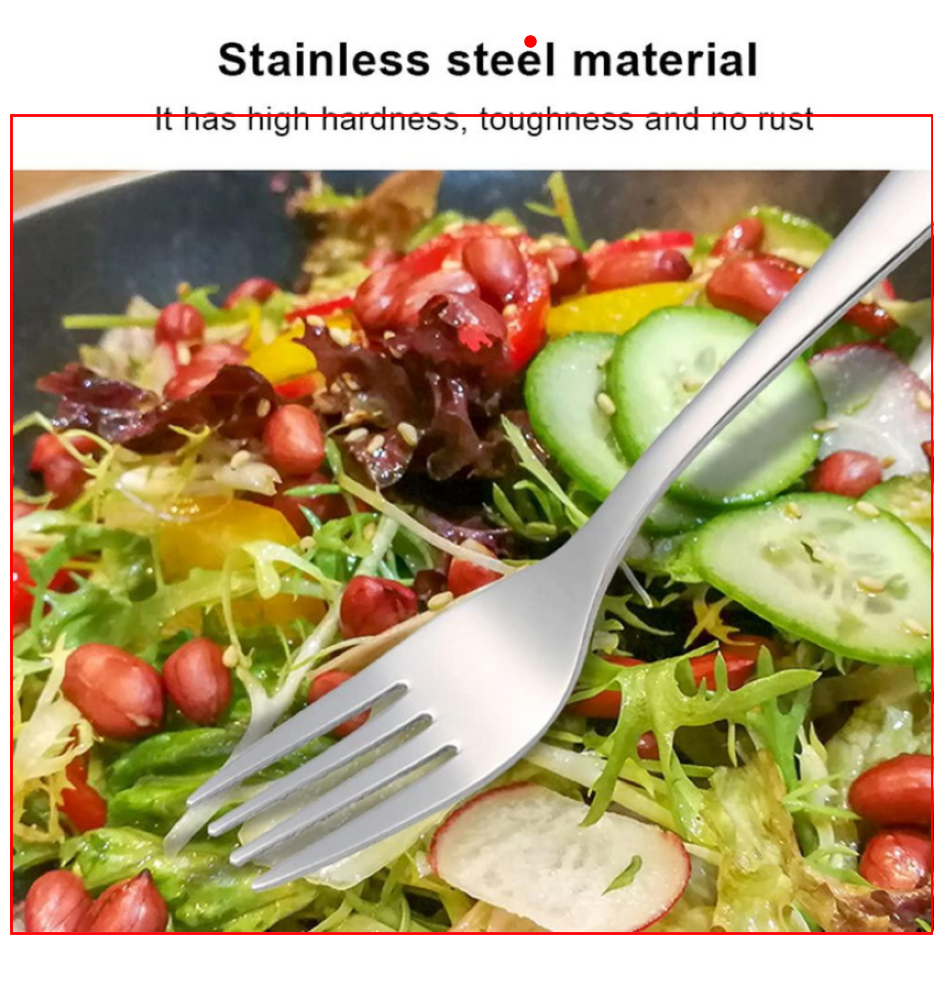

In [40]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define your image and bbox
image = sample['image'].resize((840, 840)) 
bbox = [0,96,838,840]

# Create figure and axis
fig, ax = plt.subplots(1, figsize=(10, 10))

# Display the image
ax.imshow(image)

# Create rectangle patch
# Rectangle takes (x, y, width, height)
rect = patches.Rectangle(
    (bbox[0], bbox[1]), 
    bbox[2] - bbox[0],  # width
    bbox[3] - bbox[1],  # height
    linewidth=2, 
    edgecolor='r', 
    facecolor='none'
)

# Add the patch to the axis
ax.add_patch(rect)

# Optional: add a point at the center
center_x = 473
center_y = 29
ax.plot(center_x, center_y, 'ro', markersize=8)

# Remove axis ticks for cleaner visualization
ax.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

In [27]:
from tqdm import tqdm
from transformers import Qwen2_5_VLForConditionalGeneration, AutoProcessor
from qwen_vl_utils import process_vision_info
import torch

# Load processor (you already have it loaded, but including for completeness)
processor = AutoProcessor.from_pretrained("Qwen/Qwen2.5-VL-7B-Instruct")

max_length = 0
max_length_idx = -1
all_lengths = []

# Iterate through all samples in the dataset
for idx in tqdm(range(len(dataset['train'])), desc="Processing samples"):
    sample = dataset['train'][idx]
    image = sample['image']
    text_prompt = prompt.format(Question=sample['problem'])
    
    # Prepare the conversation
    messages = [
        {
            "role": "user",
            "content": [
                {"type": "image", "image": image.resize((840, 840))},
                {"type": "text", "text": text_prompt}
            ]
        }
    ]
    
    # Prepare inputs
    text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    image_inputs, video_inputs = process_vision_info(messages)
    inputs = processor(
        text=[text],
        images=image_inputs,
        videos=video_inputs,
        padding=True,
        return_tensors="pt"
    )
    
    # Get the total length (includes text tokens + image tokens)
    current_length = inputs.input_ids.shape[1]
    all_lengths.append(current_length)
    
    if current_length > max_length:
        max_length = current_length
        max_length_idx = idx

print(f"\nMaximum prompt length: {max_length} tokens")
print(f"Found at dataset index: {max_length_idx}")
print(f"Average prompt length: {sum(all_lengths) / len(all_lengths):.2f} tokens")
print(f"Minimum prompt length: {min(all_lengths)} tokens")
print(f"\nSample with max length:")
print(f"Problem: {dataset['train'][max_length_idx]['problem']}")

Processing samples: 100%|██████████| 1800/1800 [01:25<00:00, 21.05it/s]


Maximum prompt length: 2001 tokens
Found at dataset index: 1015
Average prompt length: 1985.19 tokens
Minimum prompt length: 1981 tokens

Sample with max length:
Problem: sofa's couch_cushion


In [ ]:
prompt = 'Please find \"{Question}\" with bounding boxes and points from the given image.\n'\
'Your goal is to output tight bounding boxes and a representative point.\n\n'\
'GENERAL RULES:\n'\
'- Output tight, compact boxes with minimal extra background.\n'\
'- The representative point must lie inside \"{Question}\"\n'\
'- If nothing matches the query, output [] for the relevant JSON lists.\n'\
'- The query may refer to a whole object or a part of an object. If the query is about a part, you should first think about and find the whole object that contains the part , then find the part within that object.\n\n'\
'You MUST follow these steps and output structure.\n\n'\
'STEP 1 — Think\n'\
'In <think> </think> tags, think about:\n'\
'- What the query is asking for.\n'\
'- Whether it is a whole object or a part.\n'\
'- Where it is in the image.\n\n'\
'STEP 2 — Decide if you are finding an object or a part\n'\
'In <target> </target> tags, output either “object" or "part"\n'\
'- "object": the query is about a whole object.\n'\
'- "part": the query is about a part of an object.\n\n'\
'STEP 3 — If <target> is a “part”, locate the object to which the part belongs\n'\
'- If <target> is "part", first find the whole object(s) that contain the part. In <object_hint> </object_hint> tags, output a JSON list of these object boxes:\n'\
'[{{"bbox_2d": [x1, y1, x2, y2], "point_2d": [cx, cy]}},...]\n'\
'If <target> is “object”, inside <object_hint> tags output a single empty list: [] .\n\n'\
'STEP 4 — First Answer\n'\
'In <first_answer> </first_answer> tags, output a JSON list of the boxes for what the query directly refers to, that is \"{Question}\":\n'\
'[{{"bbox_2d": [px1, py1, px2, py2], "point_2d": [pcx, pcy]}},...]\n'\
'- If <target> is “object”, these boxes should cover the whole object.\n'\
'- If <target> is “part”, these boxes should cover only the part (not the entire object). The part should be within the object boxes in <object_hint>.\n\n'\
'STEP 5 — Criticism (Self-Check)\n'\
'In <criticism> </criticism> tags, you will check your first answer. What do the boxes in <first_answer> enclose? They should tightly enclose \"{Question}\”.  If adjustments are needed, describe the issue and suggested adjustments. Example of necessary adjustments could be to make the bboxes smaller or bigger, or move the bboxes in any direction.\n'\
'The last part inside <criticism> MUST be exactly one of:\n'\
'- "ADJUSTMENT: YES"\n'\
'- or “ADJUSTMENT: NO"\n'\
'Output "ADJUSTMENT: NO”  if the boxes and points in <first_answer> are correct and no adjustments are necessary. Output "ADJUSTMENT: YES" if the <first_answer> needs adjustments to enclose \"{Question}\"\n'\
'Examples:\n'\
'- "<criticism>...The box is already tight and correctly placed. ADJUSTMENT: NO</criticism>"\n'\
'- "<criticism>...The box is slightly too large and shifted down; I will move it up and shrink it. ADJUSTMENT: YES</criticism>"\n\n'\
'STEP 6 — FINAL ANSWER\n'\
'In <answer> </answer> tags, output the final answer.\n'\
'- If <criticism> ends with "ADJUSTMENT: NO":\n' \
'  - The JSON list in <answer> MUST be IDENTICAL to the JSON list in <first_answer>.\n'\
'- If <criticism> ends with "ADJUSTMENT: YES":\n'\
'  - At least one bbox_2d or point_2d in <answer> MUST be different from those in <first_answer>,\n'\
'    and the changes should counter the entire <criticism> and incorporate the adjustments.\n'\
'The <answer> should contain a JSON list of entries with bbox_2d and point_2d.\n'\
'[{{"bbox_2d": [qx1, qy1, qx2, qy2], "point_2d": [qcx, qcy]}},...]\n\n'\
'OUTPUT FORMAT EXAMPLE (STRUCTURE ONLY):\n'\
'<think>thinking here</think>\n'\
'<target>object|part</target>\n'\
'<object_hint>[{{"bbox_2d": [x1,y1,x2,y2], "point_2d": [cx,cy]}}, // additional boxes if found] | []</object_hint>\n'\
'<first_answer>[{{"bbox_2d": [px1,py1,px2,py2], "point_2d": [pcx,pcy]}}, // additional boxes if found]</first_answer>\n'\
'<criticism>criticism here. ADJUSTMENT: YES|NO</criticism>\n'\
'<answer>[{{"bbox_2d": [qx1,qy1,qx2,qy2], "point_2d": [qcx, qcy]}}, // additional boxes if found]</answer>\n'


In [2]:
def write_str_to_file(file_path, content):
    with open(file_path, 'w') as f:
        f.write(content)    

In [3]:
write_str_to_file('/home/ksmehrab/AttentionGrounding/ModelPlaygrounds/SegZero/EvaluationScripts/Prompts/vrpart_prompt.txt', prompt)